## Budget vs Revenue

Does a greater budget generate a greater profit?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scs
import warnings


In [2]:
movies_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
movies_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [3]:
production_budget = [] 

for budget in movies_budgets['production_budget']:
    budget = int(budget[1:].replace(",", ""))
    production_budget.append(budget)
    
movies_budgets['production_budgetINT'] = production_budget

In [4]:
domestic_gross = [] 

for gross in movies_budgets['domestic_gross']:
    gross = int(gross[1:].replace(",", ""))
    domestic_gross.append(gross)
    
movies_budgets['domestic_grossINT'] = domestic_gross

In [5]:
worldwide_gross = [] 

for gross in movies_budgets['worldwide_gross']:
    gross = int(gross[1:].replace(",", ""))
    worldwide_gross.append(gross)
    
movies_budgets['worldwide_grossINT'] = worldwide_gross

In [6]:
movies_budgets = movies_budgets[movies_budgets.worldwide_grossINT > 0]

In [8]:
budgets_top1000 = movies_budgets.sort_values(by='worldwide_grossINT', ascending=False).head(1000)
budgets_top1000

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,production_budgetINT,domestic_grossINT,worldwide_grossINT
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",425000000,760507625,2776345279
42,43,"Dec 19, 1997",Titanic,"$200,000,000","$659,363,944","$2,208,208,395",200000000,659363944,2208208395
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",306000000,936662225,2053311220
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",300000000,678815482,2048134200
33,34,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625","$1,648,854,864",215000000,652270625,1648854864
...,...,...,...,...,...,...,...,...,...
2166,67,"Jan 17, 2014",Ride Along,"$25,000,000","$134,202,565","$153,733,800",25000000,134202565,153733800
2507,8,"Jul 16, 1993",Free Willy,"$20,000,000","$77,698,625","$153,698,625",20000000,77698625,153698625
1010,11,"Apr 16, 2004",Kill Bill: Volume 2,"$55,000,000","$66,207,920","$153,535,982",55000000,66207920,153535982
971,72,"Oct 17, 1997",Devil's Advocate,"$57,000,000","$61,007,424","$153,007,424",57000000,61007424,153007424


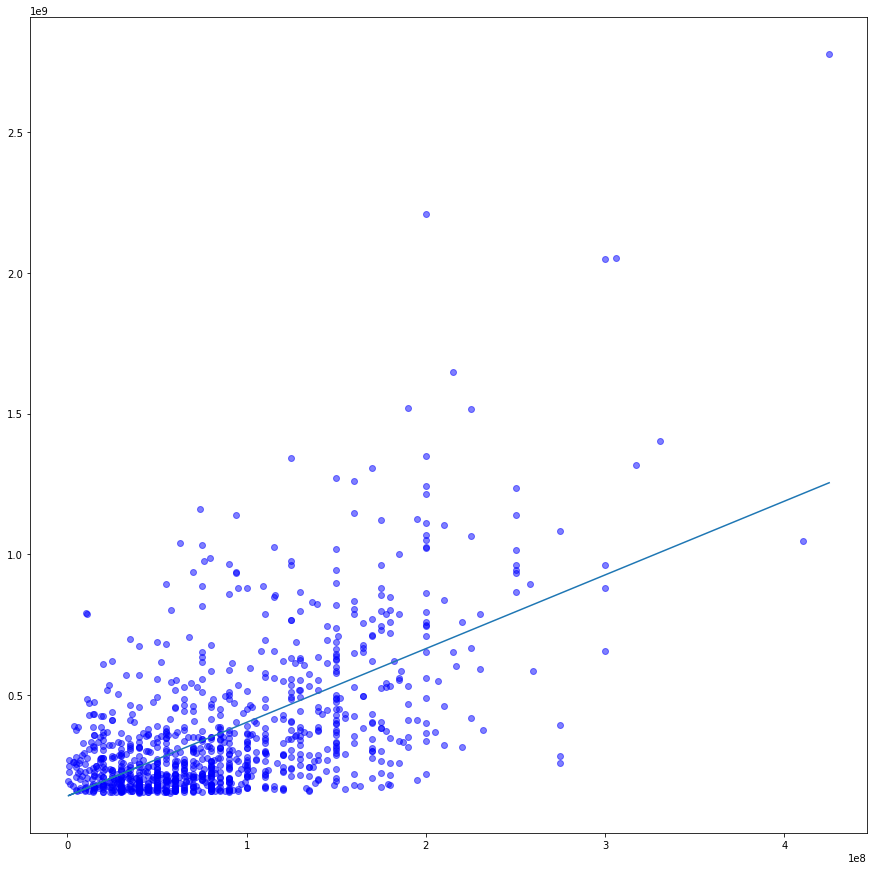

In [9]:
fig = plt.subplots(figsize=(15, 15))
x = budgets_top1000['production_budgetINT']
 
y =  budgets_top1000['worldwide_grossINT']

z = np.polyfit(x, y, 1)
p = np.poly1d(z)

plt.scatter(x, y, c ="blue", alpha = .5)
plt.plot(x, p(x))

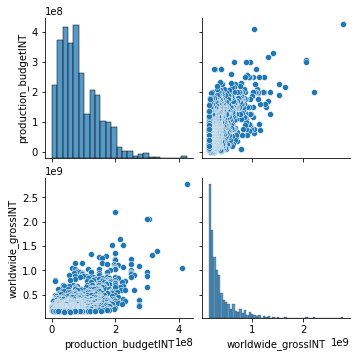

In [10]:
sns.pairplot(budgets_top1000[['production_budgetINT','worldwide_grossINT']])

In [12]:
lm = sm.OLS.from_formula('worldwide_grossINT ~ production_budgetINT',data = budgets_top1000)
result = lm.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:     worldwide_grossINT   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     550.8
Date:                Thu, 28 Jul 2022   Prob (F-statistic):           2.44e-97
Time:                        16:25:02   Log-Likelihood:                -20621.
No. Observations:                1000   AIC:                         4.125e+04
Df Residuals:                     998   BIC:                         4.125e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             1.408e+08 

In [14]:
budgets_top500 = movies_budgets.sort_values(by='worldwide_grossINT', ascending=False).head(500)
budgets_top500

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,production_budgetINT,domestic_grossINT,worldwide_grossINT
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",425000000,760507625,2776345279
42,43,"Dec 19, 1997",Titanic,"$200,000,000","$659,363,944","$2,208,208,395",200000000,659363944,2208208395
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",306000000,936662225,2053311220
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",300000000,678815482,2048134200
33,34,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625","$1,648,854,864",215000000,652270625,1648854864
...,...,...,...,...,...,...,...,...,...
125,26,"May 27, 2016",Alice Through the Looking Glass,"$170,000,000","$77,042,381","$276,928,112",170000000,77042381,276928112
2490,91,"May 20, 1987",Beverly Hills Cop II,"$20,000,000","$153,665,036","$276,665,036",20000000,153665036,276665036
525,26,"Jun 14, 2002",Scooby-Doo,"$84,000,000","$153,294,164","$276,294,164",84000000,153294164,276294164
494,95,"Mar 21, 2014",Divergent,"$85,000,000","$150,947,895","$276,014,965",85000000,150947895,276014965


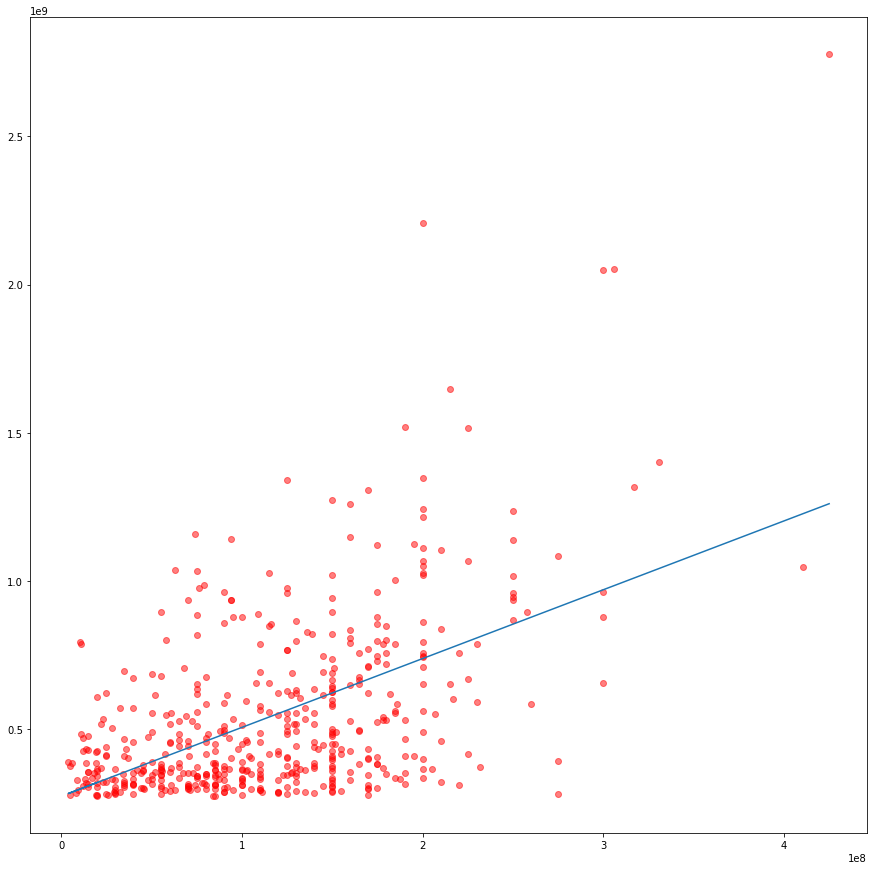

In [16]:
fig = plt.subplots(figsize=(15, 15))
x = budgets_top500['production_budgetINT']
 
y =  budgets_top500['worldwide_grossINT']

z = np.polyfit(x, y, 1)
p = np.poly1d(z)

plt.scatter(x, y, c ="red", alpha = .5)
plt.plot(x, p(x))

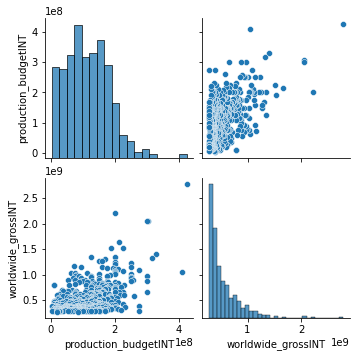

In [19]:
sns.pairplot(budgets_top500[['production_budgetINT','worldwide_grossINT']])